# MA4J5 Project - Image Recognition for Handwriting with Tensorflow
## Aadam Ul Haq - u2001509
___

This notebook will investigate different neural network architectures using the MNIST dataset to recognise handwritten digits. The package, Keras, is predominantly used within the notebook. Keras is a high-level neural networks API, written in Python. It uses specialised libraries like Tensorflow or Theano to build and train neural network models efficiently.

Warning: Some of the cells take a while to run so look at graphs before restarting and running all cells.

In [ ]:
# Importing
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import layers, models

## Loading and exploring the dataset:
We start off by loading the dataset into memory.

In [ ]:
((trainX, trainY), (testX, testY)) = mnist.load_data()
print('trainX shape:', trainX.shape)
print('Number of training examples:', trainX.shape[0])
print('Number of test examples:', testX.shape[0])

trainX shape: (60000, 28, 28)
Number of training examples: 60000
Number of test examples: 10000


The digits in the dataset go from 0-9.

In [ ]:
classes = np.unique(trainY)
num_classes = classes.shape[0]
print('There are', num_classes, 'classes:')
print(classes)

There are 10 classes:
[0 1 2 3 4 5 6 7 8 9]


We can view random samples from the dataset as shown below.

This is a number: 5


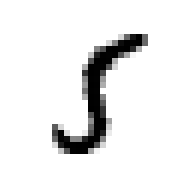

In [ ]:
index = 3289
print('This is a number:', trainY[index])
plt.subplot(221)
plt.imshow(trainX[index],cmap=plt.cm.gray_r)
plt.axis("off");

## Data Preprocessing
In order for our dataset to be compatible with Keras, we need our labels to be represented using one-hot encoding. We also want to convert the image representation from 8-bit (integer) grayscale pixels to 32-bit floating points between 0 and 1.

In [ ]:
# Convert class label to one-hot encoded vector
trainV = keras.utils.to_categorical(trainY, num_classes)
testV = keras.utils.to_categorical(testY, num_classes)

In [ ]:
# Normalise the images so pixels are between 0 and 1
trainR = trainX/255.0
testR = testX/255.0

# reshape 28*28 image into row vectors
trainR=trainR.reshape(60000,784)
testR=testR.reshape(10000,784)

## Building the neural network classifier:
Before we test different architectures, we will run a simple and often used architecture for the dataset as a test.
We stack the layers sequentially on top of each other as follows. We can build a network with inputs, a 20 neuron hidden layer, a 15 neuron hidden layer and an output layer with 10 outputs.

In [ ]:
# Initilise a sequential model
model = Sequential()

# The input layer is 784 nodes into a hidden layer of 20.
# The activation is relu which means rectified linear
model.add(Dense(20, input_dim=784,activation='relu'))
# Now add another hidden layer with 15 neurons
model.add(Dense(15,activation='relu'))
# The next layer is the output layer
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 16175 (63.18 KB)
Trainable params: 16175 (63.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Finally, we need to compile the model. When compiling, we specify the optimizer (which improves the weights), and a cost function, categorical cross-entropy in this case.

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])


### Training the model:
Below we train the model we just created

In [ ]:
batch_size=128 # Number of samples per minibatch for SGD
epochs=20 # Number of epochs to train the model

model.fit(trainR,trainV,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.7748 - accuracy: 0.4320
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7885 - accuracy: 0.7853
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5168 - accuracy: 0.8551
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4189 - accuracy: 0.8819
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3689 - accuracy: 0.8954


In [ ]:
score=model.evaluate(testR,testV,batch_size=32);
print("\n\nNumber correctly estimated ",100*score[1],"% on the test set")

313/313 [==============================] - 2s 5ms/step - loss: 0.3386 - accuracy: 0.9035


Number correctly estimated  90.35000205039978 % on the test set


### Evaluating the model
We can get the predictions from the model and plot the first 10 examples. Our accuracy was high for our test set.

313/313 [==============================] - 1s 2ms/step


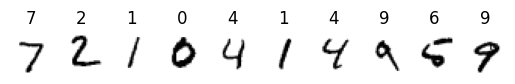

In [ ]:
P=model.predict(testR)
N=np.argmax(P[:,:],1)
ne=10
for k in range(ne):
    plt.subplot(1,ne,k+1)
    plt.imshow(testX[k],cmap=plt.cm.gray_r)
    plt.axis("off")
    plt.title(N[k]);

In [ ]:

W=model.get_weights();
print(W[0].shape) # dimensions of the weights between input and first hidden layer
print(W[1].shape) # dimension of the weights for the bias into the first hidden layer

(784, 20)
(20,)


## Experimenting with Different Parameters

Below we will experiment with didfferent parameters as explained within the project. The imports etc are done again as this was originally on a seperate notebook.

WARNING: The cell below takes a long time to run as it is creating $2*2*2*3*3 = 72$ different models

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

def load_and_normalize_data():
    # Load the dataset
    ((trainX, trainY), (testX, testY)) = mnist.load_data()

    # Normalize the data
    trainX = normalize(trainX.reshape(60000, 784))
    testX = normalize(testX.reshape(10000, 784))

    # Convert class labels to one-hot encoded vectors
    trainY = to_categorical(trainY, 10)
    testY = to_categorical(testY, 10)

    return trainX, trainY, testX, testY

def train_and_evaluate_model(model, trainX, trainY, testX, testY):
    # Train the model
    model.fit(trainX, trainY, epochs=5, batch_size=64, verbose=0)

    # Evaluate the model
    preds = model.predict(testX)
    preds = np.argmax(preds, axis=1)
    test_labels = np.argmax(testY, axis=1)
    accuracy = accuracy_score(test_labels, preds)

    return accuracy

# Define possible architectures
activations = ['sigmoid', 'relu']
optimizers = ['adam', 'sgd']
losses = ['categorical_crossentropy', 'mean_absolute_error']
num_layers = [1, 2, 3]
depths = [10, 50, 100]

# Create a dictionary to store results
results = {}

# Load and normalize the data
trainX, trainY, testX, testY = load_and_normalize_data()

# Iterate over each possible architecture
for num_layer in num_layers:
    for depth in depths:
        for optimizer in optimizers:
            for loss in losses:
                for activation in activations:
                    # Create model
                    model = Sequential()
                    model.add(Dense(depth, activation=activation, input_shape=(784,)))
                    for _ in range(num_layer - 2):
                        model.add(Dense(depth, activation=activation))
                    model.add(Dense(10, activation='softmax'))

                    # Compile model
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Train and evaluate model
                    accuracy = train_and_evaluate_model(model, trainX, trainY, testX, testY)

                    # Store results
                    key = (num_layer, depth, optimizer, loss, activation)
                    results[key] = accuracy

# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("Best architecture:")
print(sorted_results[0])


313/313 [==============================] - 1s 2ms/step
Best architecture:
((3, 100, 'adam', 'categorical_crossentropy', 'relu'), 0.971)


After running this, we can plot the 10 best and worst architectures to discover any trends in what makes a good network.

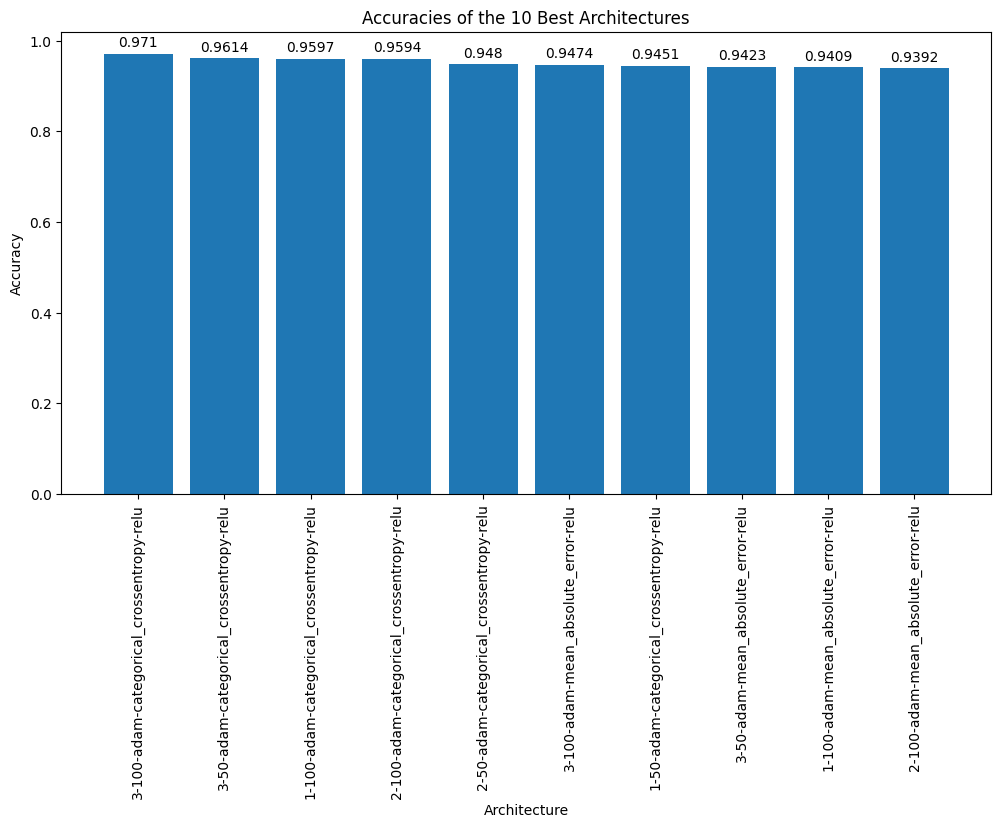

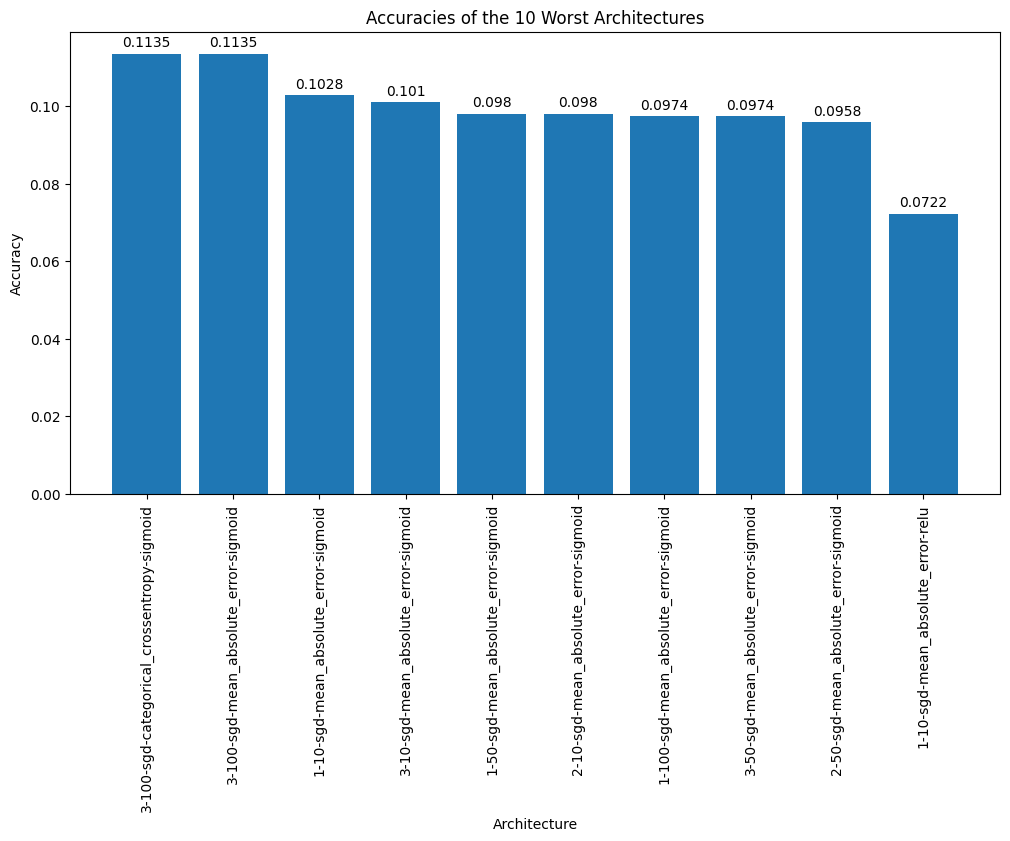

In [ ]:
import matplotlib.pyplot as plt

# Separate the keys and values from the sorted_results list
keys, values = zip(*sorted_results)

# Store the values for the 10 best and worst architectures in separate lists
best_accuracies = values[:10]
worst_accuracies = values[-10:]

# Define the x-axis labels
best_xlabels = ['{}-{}-{}-{}-{}'.format(num_layer, depth, optimizer, loss, activation) for num_layer, depth, optimizer, loss, activation in keys[:10]]
worst_xlabels = ['{}-{}-{}-{}-{}'.format(num_layer, depth, optimizer, loss, activation) for num_layer, depth, optimizer, loss, activation in keys[-10:]]

# Create a figure for the best architectures
fig1, ax1 = plt.subplots(figsize=(12, 6))

# Create a bar plot for the best architectures
rects = ax1.bar(best_xlabels, best_accuracies)

# Add accuracy values on top of each bar
ax1.bar_label(rects, padding=3)

ax1.set_title('Accuracies of the 10 Best Architectures')
ax1.set_xlabel('Architecture')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=90)

# Create a figure for the worst architectures
fig2, ax2 = plt.subplots(figsize=(12, 6))

# Create a bar plot for the worst architectures
rects = ax2.bar(worst_xlabels, worst_accuracies)

# Add accuracy values on top of each bar
ax2.bar_label(rects, padding=3)

ax2.set_title('Accuracies of the 10 Worst Architectures')
ax2.set_xlabel('Architecture')
ax2.set_ylabel('Accuracy')
ax2.tick_params(axis='x', rotation=90)

plt.show()

All of the architecutres are ranked by accuracy below so that we can notice any other trends.

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Create a DataFrame from the sorted_results list
df = pd.DataFrame(sorted_results, columns=['Architecture', 'Accuracy'])

df[['Layers', 'Depth', 'Optimizer', 'Loss', 'Activation']] = pd.DataFrame(df['Architecture'].tolist(), index=df.index)
df = df.drop(columns=['Architecture'])
# Sort the DataFrame by accuracy in descending order
sorted_df = df.sort_values(by='Accuracy', ascending=False)

# Reset the index to ensure proper numbering of rows
sorted_df = sorted_df.reset_index(drop=True)

# Display the sorted DataFrame as a table
print(sorted_df)

    Accuracy  Layers  Depth Optimizer                      Loss Activation
0     0.9710       3    100      adam  categorical_crossentropy       relu
1     0.9614       3     50      adam  categorical_crossentropy       relu
2     0.9597       1    100      adam  categorical_crossentropy       relu
3     0.9594       2    100      adam  categorical_crossentropy       relu
4     0.9480       2     50      adam  categorical_crossentropy       relu
5     0.9474       3    100      adam       mean_absolute_error       relu
6     0.9451       1     50      adam  categorical_crossentropy       relu
7     0.9423       3     50      adam       mean_absolute_error       relu
8     0.9409       1    100      adam       mean_absolute_error       relu
9     0.9392       2    100      adam       mean_absolute_error       relu
10    0.9319       2     50      adam       mean_absolute_error       relu
11    0.9306       3    100      adam  categorical_crossentropy    sigmoid
12    0.9267       1    1

### Further Investigations

Below is a graph of how the number of hidden layers effects the accuracy over time, where the only variable that changes are the number of hidden layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

313/313 - 1s - loss: 0.1155 - accuracy: 0.9643 - 575ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1031 - accuracy: 0.9688 - 524ms/epoch - 2ms/step
313/313 - 1s - loss: 0.0715 - accuracy: 0.9776 - 540ms/epoch - 2ms/step
313/313 - 1s - loss: 0.0756 - accuracy: 0.9773 - 554ms/epoch - 2ms/step


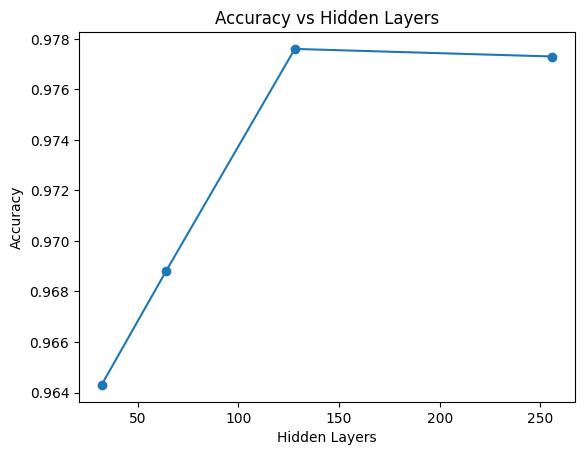

In [ ]:
# Function to build and compile the neural network
def build_model(hidden_layers):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    for units in hidden_layers:
        model.add(layers.Dense(units, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Function to train the model and return the accuracy
def train_and_evaluate(hidden_layers, epochs=5):
    model = build_model(hidden_layers)
    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    return test_acc

# Test different amounts of hidden layers and record the accuracy
hidden_layers_list = [32, 64, 128, 256]
accuracies = []

for hidden_layers in hidden_layers_list:
    accuracy = train_and_evaluate([hidden_layers])
    accuracies.append(accuracy)

# Plot the results
plt.plot(hidden_layers_list, accuracies, marker='o')
plt.title('Accuracy vs Hidden Layers')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.show()

Clearly the number of hidden layers improve the accuracy of the model up to a peak, at which the accuracy tapers off. Below we will similarly investigate the effect of the number of hidden nodes.

313/313 - 1s - loss: 0.1792 - accuracy: 0.9451 - 573ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1322 - accuracy: 0.9616 - 789ms/epoch - 3ms/step
313/313 - 1s - loss: 0.0916 - accuracy: 0.9725 - 557ms/epoch - 2ms/step
313/313 - 1s - loss: 0.0843 - accuracy: 0.9759 - 701ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1039 - accuracy: 0.9717 - 570ms/epoch - 2ms/step


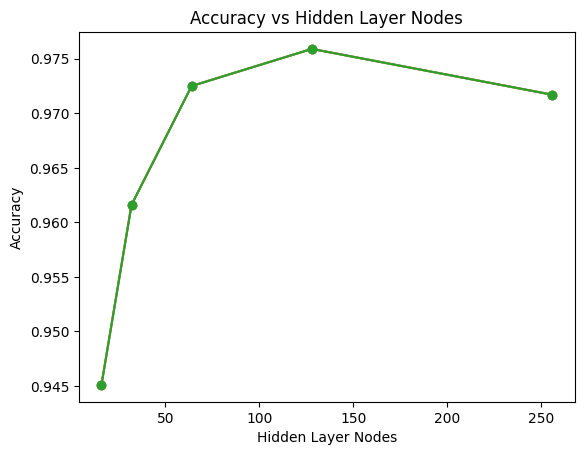

In [ ]:
# Function to build and compile the neural network
def build_model(hidden_layers):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    for units in hidden_layers:
        model.add(layers.Dense(units, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    return model

# Function to train the model and return the accuracy
def train_and_evaluate(hidden_layers, epochs=5):
    model = build_model(hidden_layers)
    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    return test_acc

# Test different amounts of nodes in each layer and record the accuracy
hidden_layers_list = [[16, 16, 16], [32, 32, 32], [64, 64, 64], [128, 128, 128], [256, 256, 256]]
accuracies = []

for hidden_layers in hidden_layers_list:
    accuracy = train_and_evaluate(hidden_layers)
    accuracies.append(accuracy)

# Plot the results
plt.plot(hidden_layers_list, accuracies, marker='o')
plt.title('Accuracy vs Hidden Layer Nodes')
plt.xlabel('Hidden Layer Nodes')
plt.ylabel('Accuracy')
plt.show()

Again, the accuracy increases up to a point and then tapers off, faster than that with the number of layers.

### Overfitting

Another factor to take into consideration is if our models overfit the training data or not. We will investigate the best and worst performing models to see this.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the training data
x_train_flatten = x_train.reshape(x_train.shape[0], 784)
x_test_flatten = x_test.reshape(x_test.shape[0], 784)
x_train_flatten = x_train_flatten / 255
x_test_flatten = x_test_flatten / 255

# Convert the labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Epoch 1/10
469/469 [==============================] - 6s 9ms/step - loss: 0.3215 - accuracy: 0.9071 - val_loss: 0.1593 - val_accuracy: 0.9506
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1213 - accuracy: 0.9636 - val_loss: 0.1112 - val_accuracy: 0.9667
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0857 - accuracy: 0.9738 - val_loss: 0.0874 - val_accuracy: 0.9728
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0650 - accuracy: 0.9803 - val_loss: 0.0937 - val_accuracy: 0.9704
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0506 - accuracy: 0.9850 - val_loss: 0.1019 - val_accuracy: 0.9678
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0426 - accuracy: 0.9865 - val_loss: 0.0802 - val_accuracy: 0.9747
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.0766 - val_accuracy: 0.9763
Epoch

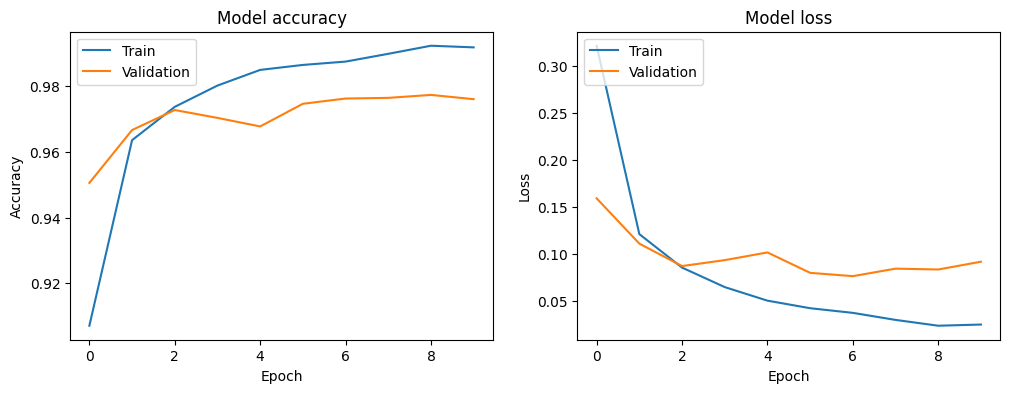

Test loss: 0.09198640286922455
Test accuracy: 0.9761000275611877


In [ ]:
# Define the first model
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=(784,)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# Compile the first model
model1.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

# Train the first model
history1 = model1.fit(x_train_flatten, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test_flatten, y_test))

# Plot the accuracy on the training and validation sets
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the loss on the training and validation sets
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the first model on the test data
score1 = model1.evaluate(x_test_flatten, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Above we see that the best model does not overfit or underfit the data. Initially there is a slight underfitting, but as the number of epochs increase, we see as expected.

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1801 - accuracy: 0.0974 - val_loss: 0.1799 - val_accuracy: 0.0982
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1798 - accuracy: 0.0974 - val_loss: 0.1796 - val_accuracy: 0.0982
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1795 - accuracy: 0.0974 - val_loss: 0.1793 - val_accuracy: 0.0982
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1792 - accuracy: 0.0974 - val_loss: 0.1790 - val_accuracy: 0.0982
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1788 - accuracy: 0.0974 - val_loss: 0.1786 - val_accuracy: 0.0982
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1785 - accuracy: 0.0975 - val_loss: 0.1783 - val_accuracy: 0.0982
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1781 - accuracy: 0.0976 - val_loss: 0.1779 - val_accuracy: 0.0986
Epoch 

<Figure size 1200x400 with 0 Axes>

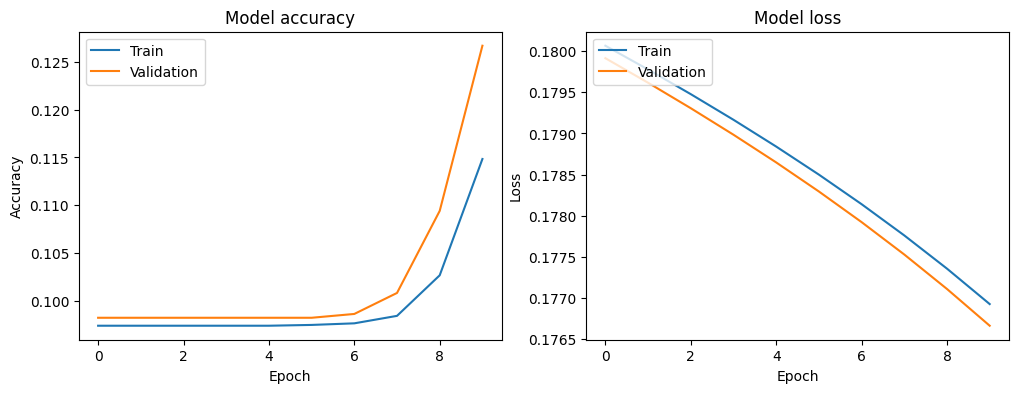

Test loss: 0.17476509511470795
Test accuracy: 0.19930000603199005


In [ ]:
# Define the second model
model2 = Sequential()
model2.add(Dense(50, activation='sigmoid', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))

# Compile the second model
model2.compile(loss=tf.keras.losses.mean_absolute_error, optimizer=tf.keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

# Train the second model
history2 = model2.fit(x_train_flatten, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test_flatten, y_test))

# Plot the accuracy on the training and validation sets
plt.figure(figsize=(12, 4))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the loss on the training and validation sets
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the first model on the test data
score1 = model1.evaluate(x_test_flatten, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

For our worst performing model, there is a clear case of underfitting of the model, as seen by the validation curve being constantly higher than the training curve.

## CNN

Another way to use image recognition is using a sophisticated method called Convolutional Neural Networks. These again have many parameters, but below is an example of just one possibility. The example has been inspired from [this article](https://medium.com/artificialis/get-started-with-computer-vision-by-building-a-digit-recognition-model-with-tensorflow-b2216823b90a) that takes advantage of a Tiny VGG architecture.

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1, ))
X_train = X_train / 255.
X_test = X_test / 255.
# print(X_train.shape)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

After importing our data, we can build the architechture of the CNN. We build the model as using the Tiny VGG model.

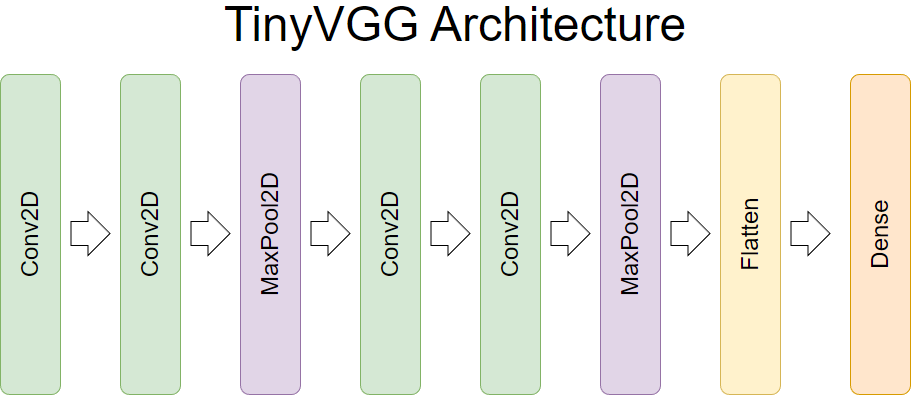


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
	layers.Conv2D(filters=10,
				kernel_size=3,
				activation="relu",
				input_shape=(28,  28,  1)),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Conv2D(10,  3, activation="relu"),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Flatten(),
	layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
			optimizer=tf.keras.optimizers.Adam(),
			metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 49s 25ms/step - loss: 0.2503 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0828 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0636 - accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0526 - accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0465 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0402 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0371 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 9/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0318 - accuracy: 0.9903
Epoch 10/10
1875/1875 [==============================] - 57s 30m

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0345 - accuracy: 0.9893


[0.03454916551709175, 0.989300012588501]

Our model has an extremely high accuracy of 98.93%. This is better than any other neural network architecture used. This shows that emerging innovations are performing better than simpler architectures.

___

## Extension : Autencoders

Autoencoders were not discussed in the report due to page limitations, however are provided as an extension to the project below:

An autoencoder is a machine-learning algorithm that is trained to copy its input (or some corrupted version thereof) to its output. The hidden layers, which describe the latent representation of the input data, typically have a lower dimensionality than the input and output.



Autoencoders have a lot of utility in the real world. In this section we look at two applications of autoencoders.

- Removing noise from images
- Compression of data

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tensorflow
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.datasets import mnist

Again we will use the MNIST dataset

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_trainR = x_train.astype('float32') / 255.
x_testR = x_test.astype('float32') / 255.

x_trainV=x_trainR.reshape(60000,784)
x_testV=x_testR.reshape(10000,784)

Check to see the data has been loaded correctly and to view the images before adding noise and compressing:

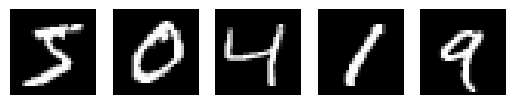

In [10]:
for n in range(5):
    plt.subplot(1,5,n+1)
    plt.imshow(x_trainR[n,:,:],cmap='gray');
    plt.axis("off")

### Adding Noise to Data

We will create two new training and test data sets that have gaussian noise of standard deviation σ
 added to them. These sets should be the same size as the original sets.
We ensure that the pixel entries are between 0 and 1 still. The command np.clip(M,0,1) will be of use for this.


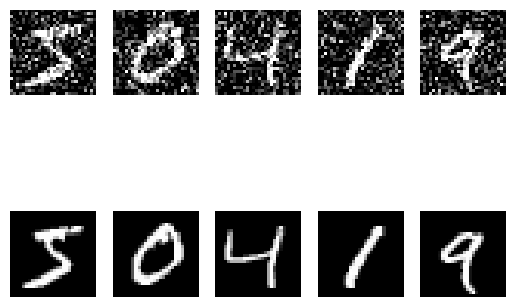

In [13]:
sigma = 0.4

x_train_noise=sigma*np.random.randn(60000,784)
x_test_noise=sigma*np.random.randn(10000,784)

x_trainN = x_trainV + sigma*np.random.randn(60000,784)
x_testN = x_testV + sigma*np.random.randn(10000,784)

x_trainN = np.clip(x_trainN, 0, 1)
x_testN = np.clip(x_testN, 0, 1)

for k in range(5):
    plt.subplot(2,5,k+1)
    plt.imshow(x_trainN[k,:].reshape(28,28),cmap='gray')
    plt.axis("off")

    plt.subplot(2,5,k+1+5)
    plt.imshow(x_trainV[k,:].reshape(28,28),cmap='gray')
    plt.axis("off")

We have now added noise to the images. Next we create a neural network.

The neural network takes in the images, has a hidden layer and then outputs a vector the same size as the input with a sigmoid activation.

In [14]:
model=Sequential()
model.add(Dense(48, input_dim=784,activation='relu'))
model.add(Dense(784,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                37680     
                                                                 
 dense_1 (Dense)             (None, 784)               38416     
                                                                 
Total params: 76096 (297.25 KB)
Trainable params: 76096 (297.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


For this neural network, we use mean square error as the loss and rmsprop as the optimizer.

In [15]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
model.fit(x_trainN,x_trainV,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 3s 4ms/step - loss: 0.0851 - accuracy: 0.0097
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0659 - accuracy: 0.0124
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0592 - accuracy: 0.0138
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0519 - accuracy: 0.0145
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0463 - accuracy: 0.0131
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0425 - accuracy: 0.0122
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0396 - accuracy: 0.0119
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0373 - accuracy: 0.0119
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0354 - accuracy: 0.0120
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0337 - accuracy: 0.0116

Finally, we use the autoencoder to see how well it was at removing the noise from our data:

313/313 [==============================] - 1s 3ms/step


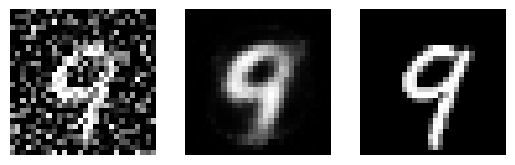

In [16]:
P=model.predict(x_testN)
n=12
plt.subplot(131)
plt.imshow(x_testN[n,:].reshape(28,28),cmap='gray')
plt.axis("off")

plt.subplot(132)
plt.imshow(P[n,:].reshape(28,28),cmap='gray')
plt.axis("off")

plt.subplot(133)
plt.imshow(x_testV[n,:].reshape(28,28),cmap='gray')
plt.axis("off");

Clearly it worked well! The noisy one is on the left, the de-noised in the middle and the original is on the right. It is not perfect however did a good job at removing noise from our image so we can see the number $9$ clearer.

### Compressing Data

Now we can try the second use of compressing the images. To do this we build a network that can compress the data. This is achieved by having an input and output layer the same size, but an intermediate layer that is much smaller, between more hidden layers.

In [17]:
model=Sequential()
model.add(Dense(128, input_dim=784,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(784,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 202258 (790.07 KB)
Trainable params: 202258 (790.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
model.fit(x_trainV,x_trainV,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 4s 6ms/step - loss: 0.0998 - accuracy: 0.0077
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0684 - accuracy: 0.0143
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0644 - accuracy: 0.0165
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0620 - accuracy: 0.0127
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0607 - accuracy: 0.0113
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0594 - accuracy: 0.0125
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.0105
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0578 - accuracy: 0.0104
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0573 - accuracy: 0.0103
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0569 - accuracy: 0.0104

313/313 [==============================] - 1s 3ms/step


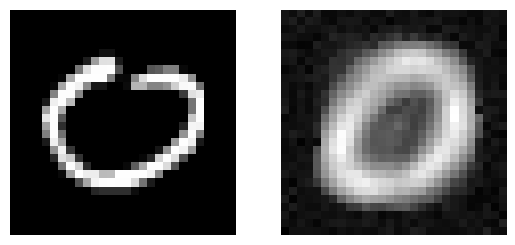

In [19]:
P=model.predict(x_testV)
n=561
plt.subplot(121)
plt.imshow(x_testV[n,:].reshape(28,28),cmap='gray')
plt.axis("off")

plt.subplot(122)
plt.imshow(P[n,:].reshape(28,28),cmap='gray')
plt.axis("off");

The data is now compressed. We can split the network in half to investigate what is happening when we reduce the layers and then increase the layers. We do this using the same weights as the full model.

In [20]:
halfinmodel=Sequential()
halfinmodel.add(Dense(128, input_dim=784,activation='relu',weights=model.layers[0].get_weights()))
halfinmodel.add(Dense(2,activation='relu',weights=model.layers[1].get_weights()))

halfoutmodel=Sequential()
halfoutmodel.add(Dense(128,input_dim=2,activation='relu',weights=model.layers[2].get_weights()))
halfoutmodel.add(Dense(784,activation='sigmoid',weights=model.layers[3].get_weights()))

In [21]:
halfinmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 100738 (393.51 KB)
Trainable params: 100738 (393.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
halfoutmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dense_9 (Dense)             (None, 784)               101136    
                                                                 
Total params: 101520 (396.56 KB)
Trainable params: 101520 (396.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Finally, we can take the values from the half built neural network and plot them on an axis. We can do this because our middle layer only has two hidden nodes. We can colour co-ordinate by number and visualise on the graph how the coordinates in the compression output the individual numbers.

There are two plots for simplicity: one for numbers $0-4$ and another for $5-9$.

313/313 [==============================] - 1s 3ms/step


(1.0, 100.0, 1.0, 100.0)

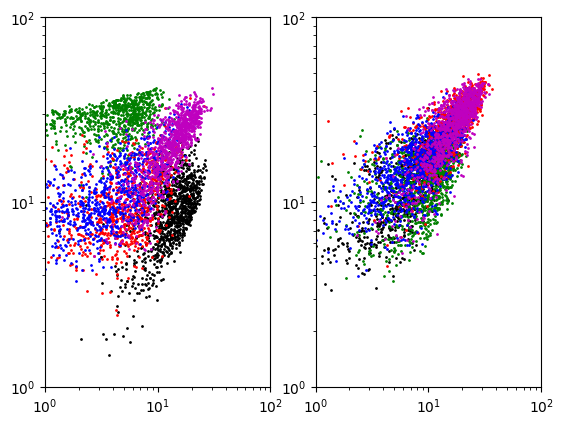

In [23]:
midactivations = halfinmodel.predict(x_testV)
x=midactivations[:,0]
y=midactivations[:,1]

s0=np.where(y_test==0); x0=x[s0]; y0=y[s0]; plt.subplot(121); plt.loglog(x0,y0,'ok',markersize=1)
s1=np.where(y_test==1); x1=x[s1]; y1=y[s1]; plt.subplot(121); plt.plot(x1,y1,'og',markersize=1)
s2=np.where(y_test==2); x2=x[s2]; y2=y[s2]; plt.subplot(121); plt.plot(x2,y2,'or',markersize=1)
s3=np.where(y_test==3); x3=x[s3]; y3=y[s3]; plt.subplot(121); plt.plot(x3,y3,'ob',markersize=1)
s4=np.where(y_test==4); x4=x[s4]; y4=y[s4]; plt.subplot(121); plt.plot(x4,y4,'om',markersize=1)
plt.axis([1.0,100.0,1.0,100])

s5=np.where(y_test==5); x5=x[s5]; y5=y[s5]; plt.subplot(122); plt.loglog(x5,y5,'ok',markersize=1)
s6=np.where(y_test==6); x6=x[s6]; y6=y[s6]; plt.subplot(122); plt.plot(x6,y6,'og',markersize=1)
s7=np.where(y_test==7); x7=x[s7]; y7=y[s7]; plt.subplot(122); plt.plot(x7,y7,'or',markersize=1)
s8=np.where(y_test==8); x8=x[s8]; y8=y[s8]; plt.subplot(122); plt.plot(x8,y8,'ob',markersize=1)
s9=np.where(y_test==9); x9=x[s9]; y9=y[s9]; plt.subplot(122); plt.plot(x9,y9,'om',markersize=1);
plt.axis([1.0,100.0,1.0,100])

We can take co-ordinates from the graphs and run them through the second half of the model to almost create hybrid numbers. Some can be predicted by looking at the above graph, others were deliberately chosen near the gray areas in which there are many possibilities.

1/1 [==============================] - 0s 53ms/step


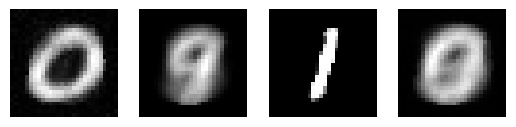

In [32]:
mymid=np.array([[15,5],[10,15],[1,200], [9,9]])
myP=halfoutmodel.predict(mymid)

for k in range(4):
    plt.subplot(1,4,k+1)
    plt.imshow(myP[k,:].reshape(28,28),cmap='gray')
    plt.axis("off")